In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.15.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
sns.countplot(y_train)

<Axes: ylabel='count'>

Error in callback <function flush_figures at 0x7b32a5133a30> (for post_execute):


KeyboardInterrupt: 

In [5]:
np.isnan(x_train).any()

False

In [6]:
np.isnan(x_test).any()

False

In [7]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [8]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


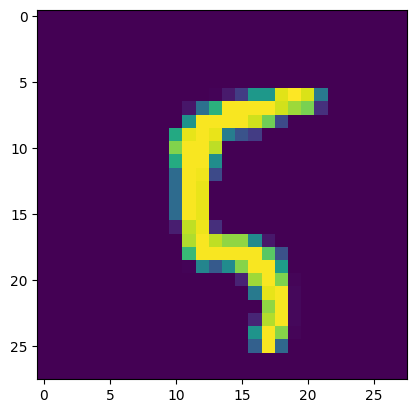

In [9]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [10]:
batch_size = 64
num_classes = 10
epochs = 5

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),  # Adjusted pooling layer
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])
predictions = model.predict(np.expand_dims(x_test[0], axis=0))
print(predictions)


Epoch 1/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0635 - acc: 0.9839 - val_loss: 0.0296 - val_acc: 0.9935
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0600 - acc: 0.9851 - val_loss: 0.0317 - val_acc: 0.9942
Epoch 3/5
844/844 [==============================] - 6s 8ms/step - loss: 0.0621 - acc: 0.9839 - val_loss: 0.0375 - val_acc: 0.9928
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0662 - acc: 0.9834 - val_loss: 0.0348 - val_acc: 0.9927
Epoch 5/5
1/1 [==============================] - 0s 270ms/step


7


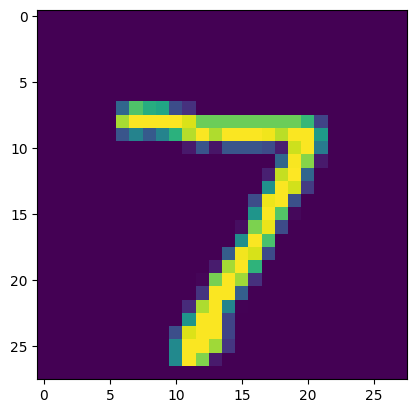

In [36]:
print(np.argmax(predictions))
plt.imshow(x_test[0])


In [30]:
y_train.shape

(60000, 10)

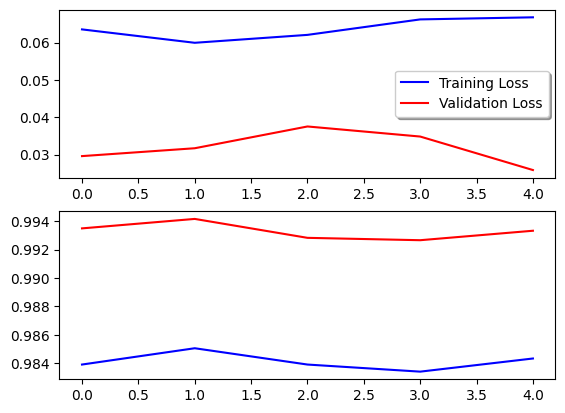

In [31]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0276 - acc: 0.9927


In [33]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)


313/313 [==============================] - 1s 3ms/step


<Axes: >

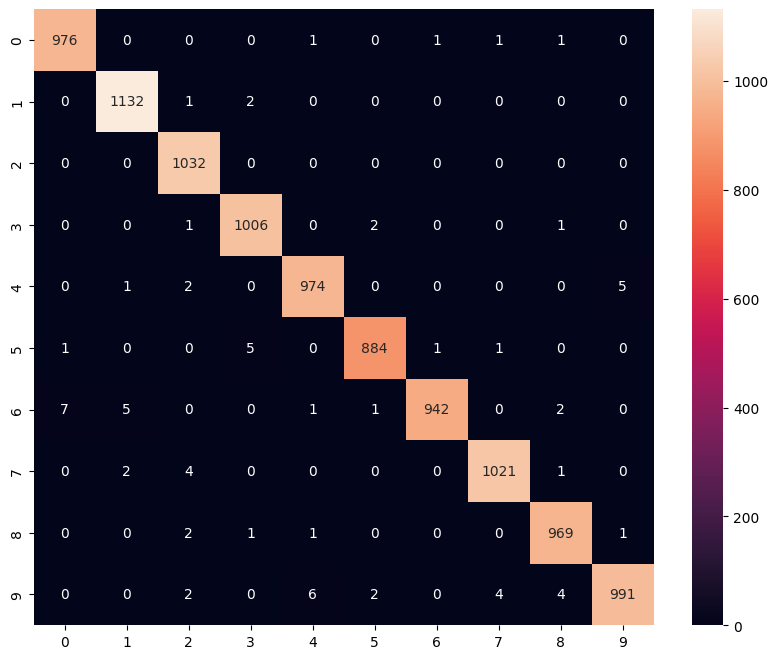

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')